# Tutorial Brief

Web scrpping a one of the most common method of collecting data. This tutorial covers the basics of web scraping.

**Video Tutorial**:

http://youtu.be/wT66i7jeyL8

More About LXML:

http://lxml.de/

In [1]:
from datetime import datetime

from lxml import html
import requests

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

pd.options.display.max_columns=50

# Data and Data Source

We will be working with the Nobel Prize data. We will get that from Wikipedia
![](http://upload.wikimedia.org/wikipedia/en/e/ed/Nobel_Prize.png)

Webpage URL:

http://en.wikipedia.org/wiki/List_of_Nobel_laureates

## Before you Web Scrape - Read the ToS

Please make sure that you read the ToS (Terms of Service) of the website before you web scrape any data. Most websites don't allows web scraping of their content. Some allow moderate use.

For Wikipedia:

> ## 4. Refraining from Certain Activities
> ### Engaging in Disruptive and Illegal Misuse of Facilities
>  Engaging in automated uses of the site that are abusive or disruptive of the services and have not been approved by the Wikimedia community;
> ##### [Wikimedia Foundation Terms of Use](wikimediafoundation.org/wiki/Terms_of_Use#4._Refraining_from_Certain_Activities)

**From my basic technical understanding**:

This means "automated uses" like web scraping are not allowed if they are "abusive or disruptive of the services" but I would argue web scraping a single page is not "abusive or disruptive of the services". Web scraping will actually consume less servers time and bandwidth than reading the page in a browser. This is due to the fact that we will only request the page and none of the static files linked to it like CSS, images, javascript ... etc.

**DISCLAIMERL**: I'm not a lawyer

##Basic Rules:

- Check if there is an API use it. It will make your life easier.
- Don't use scrape too much in a short time. It slows down the servers and might gets you banned from the website.
- Never scrape anything that is not public.
- Check /robots.txt for allowed paths

# Fetch page & build HTML tree

In [2]:
def print_element(element):
    print "<%s %s>%s ..." % (element.tag, element.attrib, element.text_content()[:200].replace("\n", " "))

In [4]:
page = requests.get('http://en.wikipedia.org/wiki/List_of_Nobel_laureates')
tree = html.fromstring(page.text)
print_element(tree)


<html {'lang': 'en', 'class': 'client-nojs', 'dir': 'ltr'}>   List of Nobel laureates - Wikipedia, the free encyclopedia document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" ); (window.RLQ ...


## Locate The table

### First we find all tables

In [5]:
tables = tree.xpath('//table')
for table in tables:
    print_element(table)

<table {'class': 'wikitable sortable'}>  Year Physics Chemistry Physiology or Medicine Literature Peace Economics   1901 Röntgen, WilhelmWilhelm Röntgen Hoff, Jacobus Henricus van 'tJacobus Henricus van 't Hoff von Behring, Emil AdolfEmil  ...
<table {'style': 'border:1px solid #aaa;background-color:#f9f9f9', 'class': 'mbox-small plainlinks sistersitebox'}>   Wikimedia Commons has media related to Nobel laureates.   ...
<table {'style': 'border-spacing:0', 'class': 'navbox'}>        v t e   Nobel Prizes       Prizes    Chemistry Economics1 Literature Peace Physics Physiology or Medicine         Laureates     by subject    Chemistry Economics Literature Peace Physics Physi ...
<table {'style': 'border-spacing:0;background:transparent;color:inherit', 'class': 'nowraplinks hlist collapsible collapsed navbox-inner'}>     v t e   Nobel Prizes       Prizes    Chemistry Economics1 Literature Peace Physics Physiology or Medicine         Laureates     by subject    Chemistry Economics Literatur

**When locating the table watchout for client side javascript alteration to the HTML code**

In [6]:
table = tree.xpath('//table[@class="wikitable sortable"]')[0]
print_element(table)

<table {'class': 'wikitable sortable'}>  Year Physics Chemistry Physiology or Medicine Literature Peace Economics   1901 Röntgen, WilhelmWilhelm Röntgen Hoff, Jacobus Henricus van 'tJacobus Henricus van 't Hoff von Behring, Emil AdolfEmil  ...


## Extract the Subjects & Years

In [8]:
subjects = [subject[0].text_content().replace("\n"," ") for subject in table.xpath('tr')[0][1:]]
subjects

['Physics',
 'Chemistry',
 'Physiology\nor Medicine',
 'Literature',
 'Peace',
 'Economics']

In [9]:
years = [item[0].text for item in table.xpath('tr')[1:-1]]

## Extract Winners Data

### Testing for a sigle years

In [10]:
for index, item in enumerate(table.xpath('tr')[1][1:]):
    subject = subjects[index]
    print "%s:" % subject
    for winner in item.xpath('span[@class="vcard"]/span/a'):
        winner_name = winner.attrib["title"]
        winner_url = winner.attrib["href"]
        print " - %s" % winner_name


Physics:
 - Wilhelm Röntgen
Chemistry:
 - Jacobus Henricus van 't Hoff
Physiology
or Medicine:
 - Emil Adolf von Behring
Literature:
 - Sully Prudhomme
Peace:
 - Henry Dunant
 - Frédéric Passy
Economics:


### Extract The complete table

In [11]:
year_list = []
subject_list = []
name_list = []
url_list = []
for y_index, year in enumerate(years):
    print year
    for index, item in enumerate(table.xpath('tr')[y_index + 1][1:]):
        subject = subjects[index]
        #print "%s:" % subject
        for winner in item.xpath('span[@class="vcard"]/span/a'):
            winner_name = winner.attrib["title"]
            winner_url = winner.attrib["href"]
            #print " - %s" % winner_name
            year_list.append(year)
            subject_list.append(subject)
            name_list.append(winner_name)
            url_list.append(winner_url)

1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


# Post Processing in Pandas

In [12]:
data_set = pd.DataFrame(name_list, columns=["winner_name"])
data_set["subject"] = subject_list
data_set["year"] = year_list
data_set["year"] = data_set["year"].astype(np.int32)
data_set["url"] = url_list
data_set.head(5)

,winner_name,subject,year,url
0,Wilhelm Röntgen,Physics,1901,/wiki/Wilhelm_R%C3%B6ntgen
1,Jacobus Henricus van 't Hoff,Chemistry,1901,/wiki/Jacobus_Henricus_van_%27t_Hoff
2,Emil Adolf von Behring,Physiology\nor Medicine,1901,/wiki/Emil_Adolf_von_Behring
3,Sully Prudhomme,Literature,1901,/wiki/Sully_Prudhomme
4,Henry Dunant,Peace,1901,/wiki/Henry_Dunant


## Looking at the data

In [13]:
years_df = data_set["year"].value_counts().sort_index()
years_df

1901     6
1902     7
1903     7
1904     5
1905     5
1906     6
1907     6
1908     7
1909     7
1910     4
1911     6
1912     6
1913     5
1914     3
1915     4
1916     1
1917     3
1918     2
1919     4
1920     5
1921     5
1922     6
1923     5
1924     3
1925     6
1926     6
1927     7
1928     4
1929     7
1930     5
        ..
1986    11
1987     9
1988    11
1989    10
1990    11
1991     7
1992     7
1993    11
1994    12
1995    11
1996    13
1997    11
1998    12
1999     6
2000    13
2001    14
2002    13
2003    11
2004    12
2005    12
2006     8
2007    11
2008    12
2009    13
2010    11
2011    13
2012    10
2013    13
2014    13
2015    11
Name: year, dtype: int64

## Number of Prizes per Year

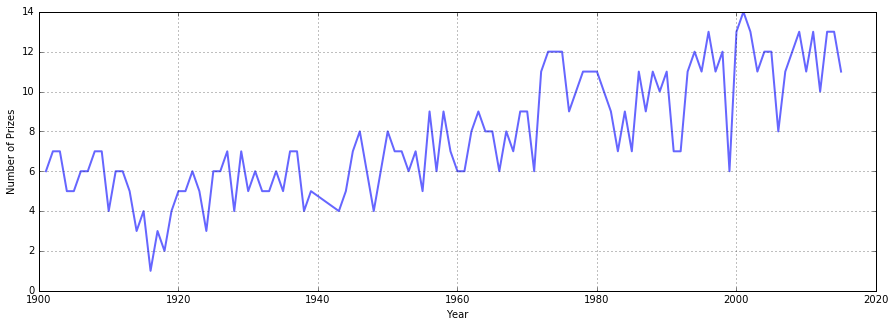

Total Prizes: 877


In [14]:
plt.figure(figsize=(15,5))
plt.plot(years_df.index, years_df.values, linewidth=2, alpha=.6)
plt.grid()
plt.xlabel("Year")
plt.ylabel("Number of Prizes")
plt.show();
print "Total Prizes: %s" % len(data_set)

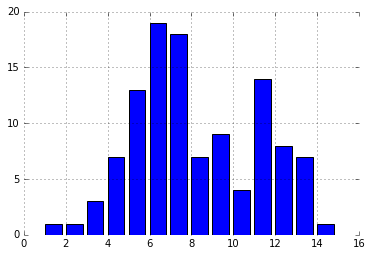

In [15]:
years_df.value_counts()
plt.bar(years_df.value_counts().index, years_df.value_counts())
plt.box(on="off")
plt.grid()
plt.xlabel("Number of Nober Prizes/Year")
plt.xlabel("")
plt.show();

## By Subject

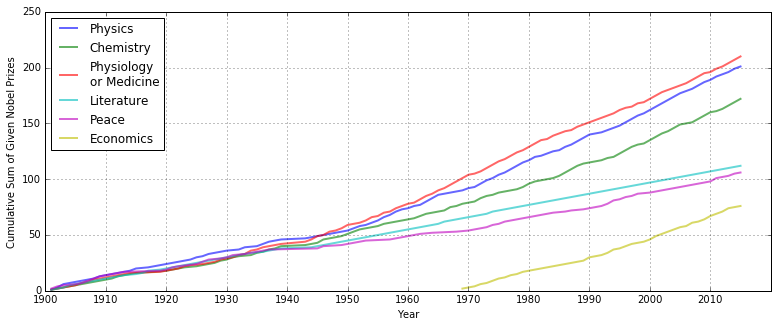

In [16]:
plt.figure(figsize=(13,5))

for subject in subjects:
    df = data_set[data_set["subject"]==subject]["year"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label=subject, linewidth=2, alpha=.6)


plt.grid()
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Cumulative Sum of Given Nobel Prizes")
plt.xticks(np.arange(1900, 2020, 10))

plt.show();

# The effects of WW I and WW II

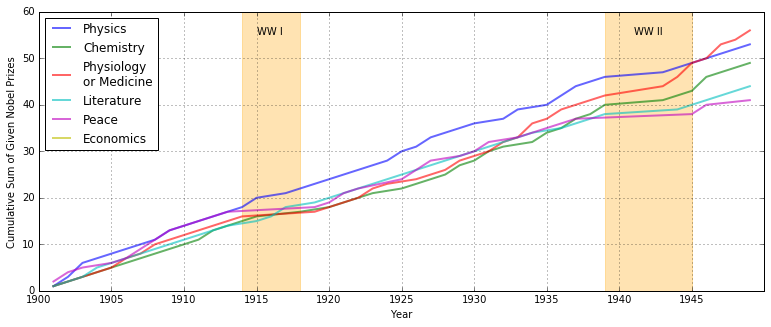

In [17]:
plt.figure(figsize=(13,5))

for subject in subjects:
    df = data_set[(data_set["subject"]==subject) &
                  (data_set["year"].astype(np.int32)<1950)]["year"].value_counts().sort_index().cumsum()
    plt.plot(df.index, df, label=subject, linewidth=2, alpha=.6)

plt.grid()
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Cumulative Sum of Given Nobel Prizes")
plt.xticks(np.arange(1900, 1950, 5))

gca = plt.gca()

gca.add_patch(plt.Rectangle((1914,0), 4, 60, alpha=.3, color="orange"))
gca.add_patch(plt.Rectangle((1939,0), (45-39), 60, alpha=.3, color="orange"))

plt.annotate(s="WW I", xy=(1915,55))
plt.annotate(s="WW II", xy=(1941,55))
plt.show();